# Call Durations and Sales Outcome in Telemarketing Campaigns

By Eun Ji Hwang, Daniel Dai, Camilla Ren, Rachel Yang

## Table of content

### Index: 
1.[Introduction](#Introduction)  
2.[Methods and Results](#MethodsandResults)   
3.[Discussion](#Discussion)   
4.[Reference](#Reference)

## <img src="https://th.bing.com/th/id/R.3849382c629e1a734ac29d79a0656ea2?rik=A6LFA%2bGN%2b07q9Q&riu=http%3a%2f%2fwww.pngmart.com%2ffiles%2f1%2fPhone.png&ehk=DewsIHJL6yqq69NhIyBSqo6A%2fEnade%2boWXdZCaNB03g%3d&risl=&pid=ImgRaw&r=0" width=30> Introduction

### Background:
Marketing sales campaign is a typical strategy used by companies to grow their business. In particular, telemarketing conducted remotely has enabled marketing to optimize customer lifetime value by evaluating available information and metrics, hence allowing the company to build longer and tighter relationships in alignment with business demand.

<img src="https://th.bing.com/th/id/R.8c8656b19cf1e229b4d8154de1b2f8b6?rik=BWfEliq15MzvBQ&riu=http%3a%2f%2fwww.pollenmidwest.org%2fwp-content%2fuploads%2f2017%2f04%2fbanking2.gif&ehk=CRhvAOpg%2bzexGRo8tdAQsWMixVUj8xnxdDQxQx%2bU%2fmM%3d&risl=&pid=ImgRaw&r=0" width=500>



### Our Question:
Previous study has shown that the last contact duration that needed to be rescheduled to obtain a final answer from the client, is the one of the most relevant attributes that determine the outcome of the telemarketing campaign ("success" or "failure") (Moro, Sérgio, et al., 2014). Data on the last call duration were stored in the “duration” column in the dataset. Outcomes of telemarketing campaigns were stored in the "y" of column of the dataset.

Our goal is to compare whether there exist significant differences in last contact duration between a successful outcome and a failed outcome. As will be illustrated later, the sample distributions of the call durations of are right skewed for both successful and failed outcomes. Hence, for this report, we will use the difference of median of the last contact duration between successful outcomes and failed outcomes as the location parameter and the IQR as the scale parameter.

### Our Dataset:

We will use the Bank Marketing Data Set retrived from the UCI Learning Respotory. This dataset is related to telemarketing campaigns of a Portuguese banking institution, where the campaigns were based on phone calls. Each record contains several numerical variables (e.g. age, contact duration, three-month Eutibor) and some categorical variables (e.g. y which indicates contact outcome ("success" or "failure")). We will only focus on the "duration" and "y" column.

## <img src="https://th.bing.com/th/id/R.3849382c629e1a734ac29d79a0656ea2?rik=A6LFA%2bGN%2b07q9Q&riu=http%3a%2f%2fwww.pngmart.com%2ffiles%2f1%2fPhone.png&ehk=DewsIHJL6yqq69NhIyBSqo6A%2fEnade%2boWXdZCaNB03g%3d&risl=&pid=ImgRaw&r=0" width=30>Methods and Results

### 2.0 Required Packages 

In [1]:
# Load package
library(tidyverse)
library(GGally)
library(infer)
library(gridExtra)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2


Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine




### 2.1 Premilinary results

Read in the bank data into R, and rename the column name for readability

In [26]:
bank_data <- read_delim("bank_additional_full.csv", skip=1, delim = ";", col_names = FALSE)%>%
                rename(age = X1,job = X2, marital = X3, education = X4,  default = X5, housing = X6, loan = X7, contact = X8, 
                                  month = X9, day_of_week = X10, duration = X11, campaign  =X12, pdays = X13, previous = X14, poutcome = X15, 
                                  emp_var_rate = X16, cons_price_idx = X17, cons_conf_idx = X18, euribor_3m = X19, nr_employed = X20,
                                  y = X21)

head(bank_data)

Rows: 41188 Columns: 21
── Column specification ────────────────────────────────────────────────────────
Delimiter: ";"
chr (11): X2, X3, X4, X5, X6, X7, X8, X9, X10, X15, X21
dbl (10): X1, X11, X12, X13, X14, X16, X17, X18, X19, X20

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


age,job,marital,education,default,housing,loan,contact,month,day_of_week,⋯,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,⋯,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


Table 2.1.1: head the raw data set with readable column names

Create a ggpairs scatterplot of last call duration "duration" and contact outcome "y".

In [ ]:
options(repr.plot.width = 20, repr.plot.height = 15)
bank_data_compare <- bank_data%>%
            select(age, duration, campaign, pdays, previous, emp_var_rate, cons_price_idx,cons_conf_idx,euribor_3m,nr_employed,y)%>%
            ggpairs(aes(color = y))
bank_data_compare

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



Figure 2.1.2: pairs plot with last call duration and contact outcome

Create boxplots for all numeric variables. And since for the euribor_3m column the number is too big to visulize we mutate it to log.

Warning message:
“Removed 1515 rows containing non-finite values (stat_boxplot).”


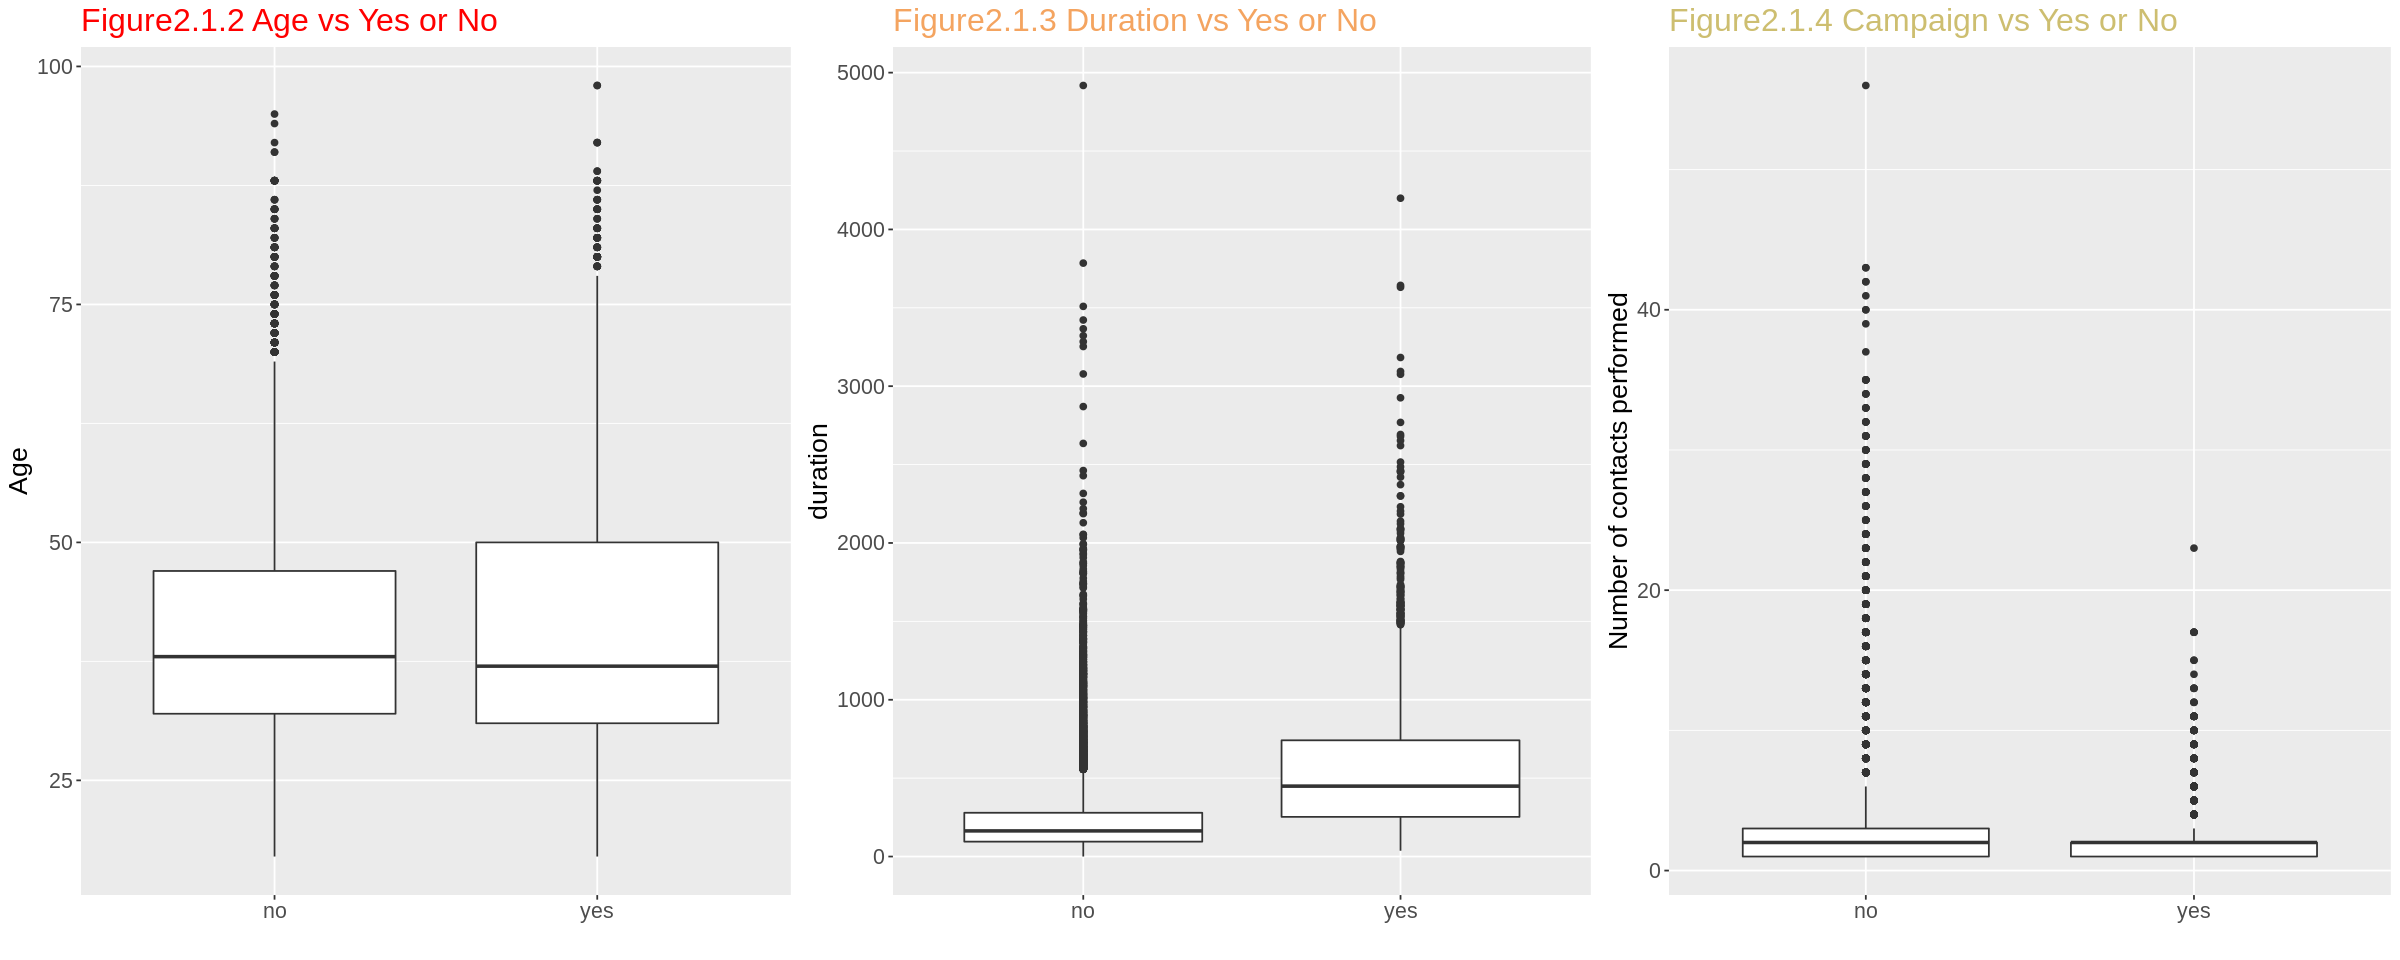

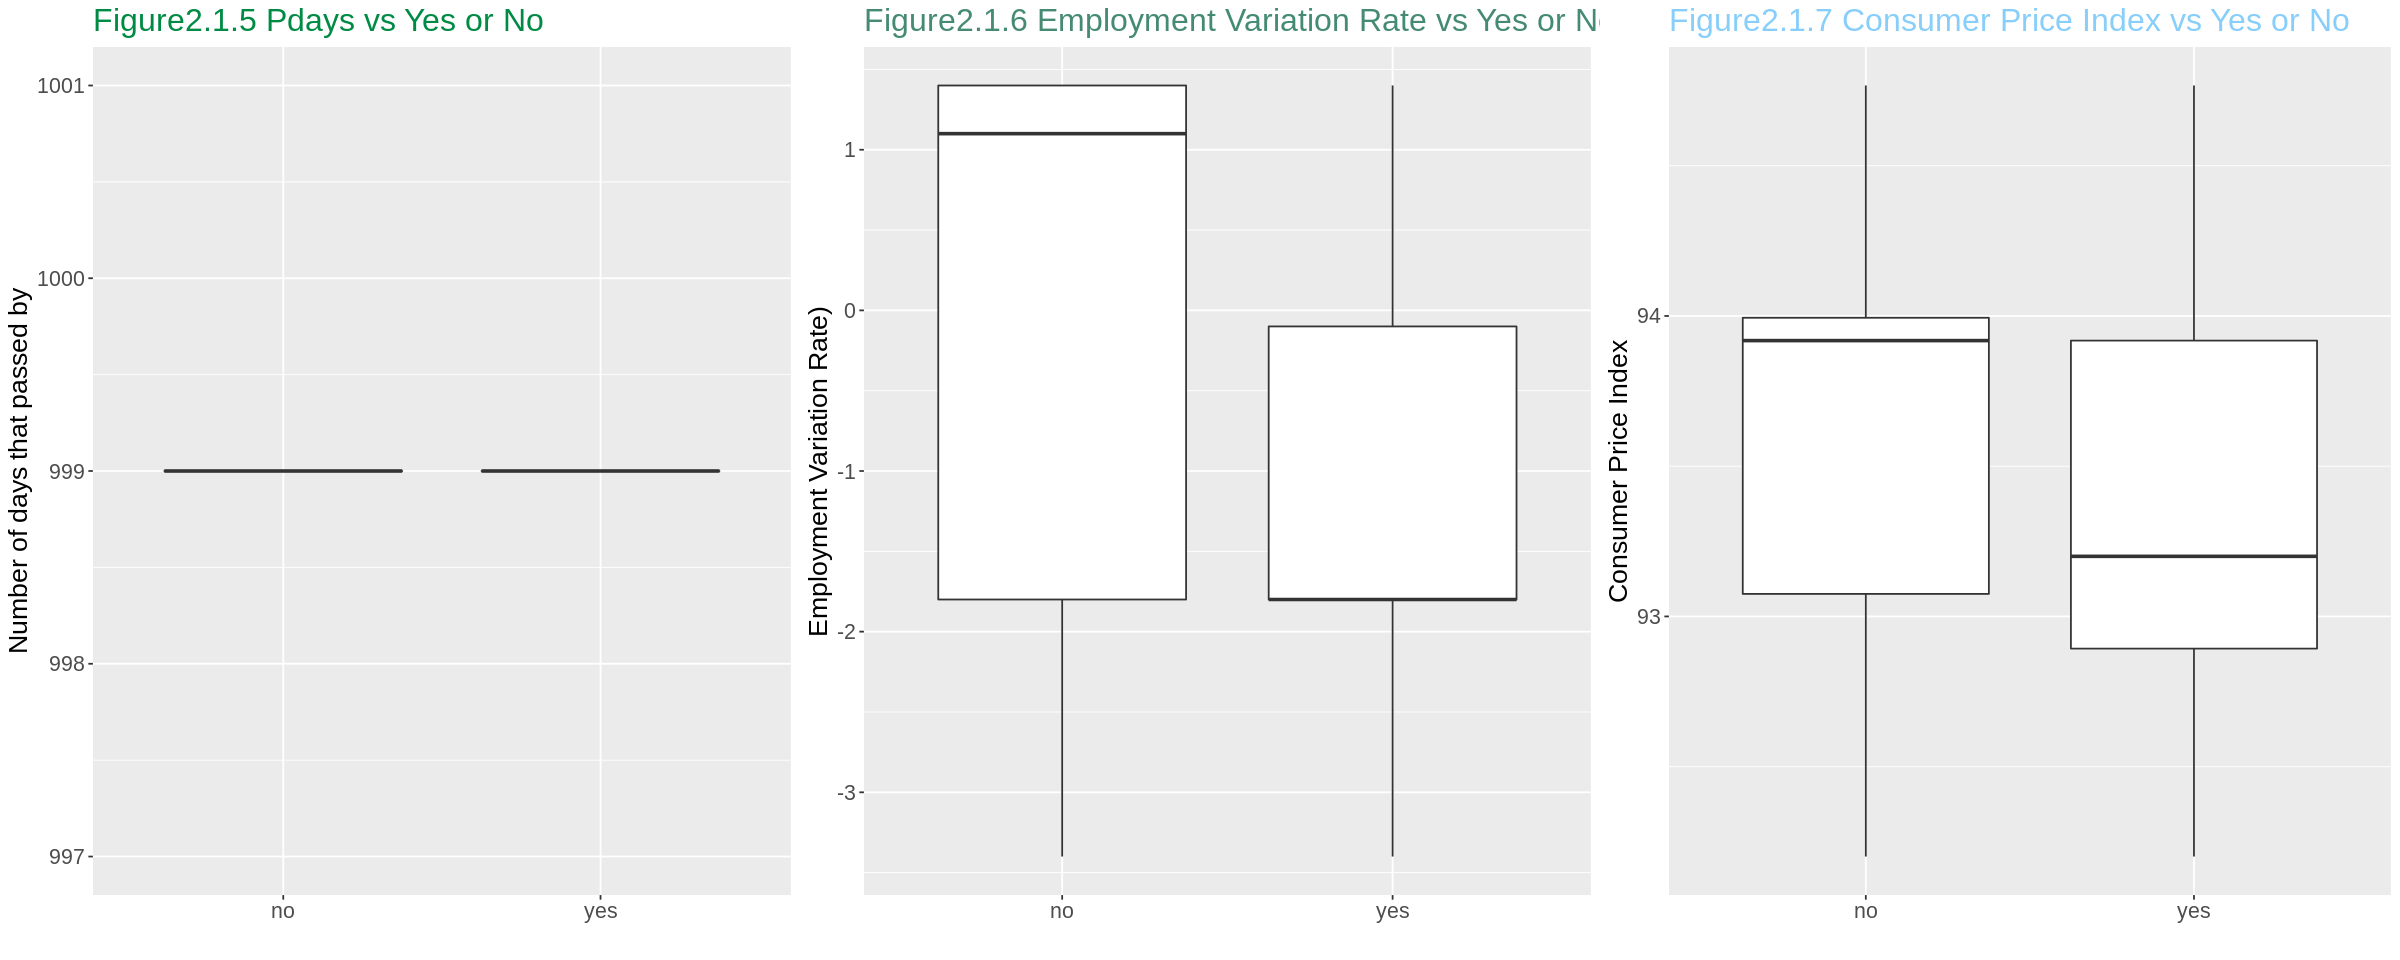

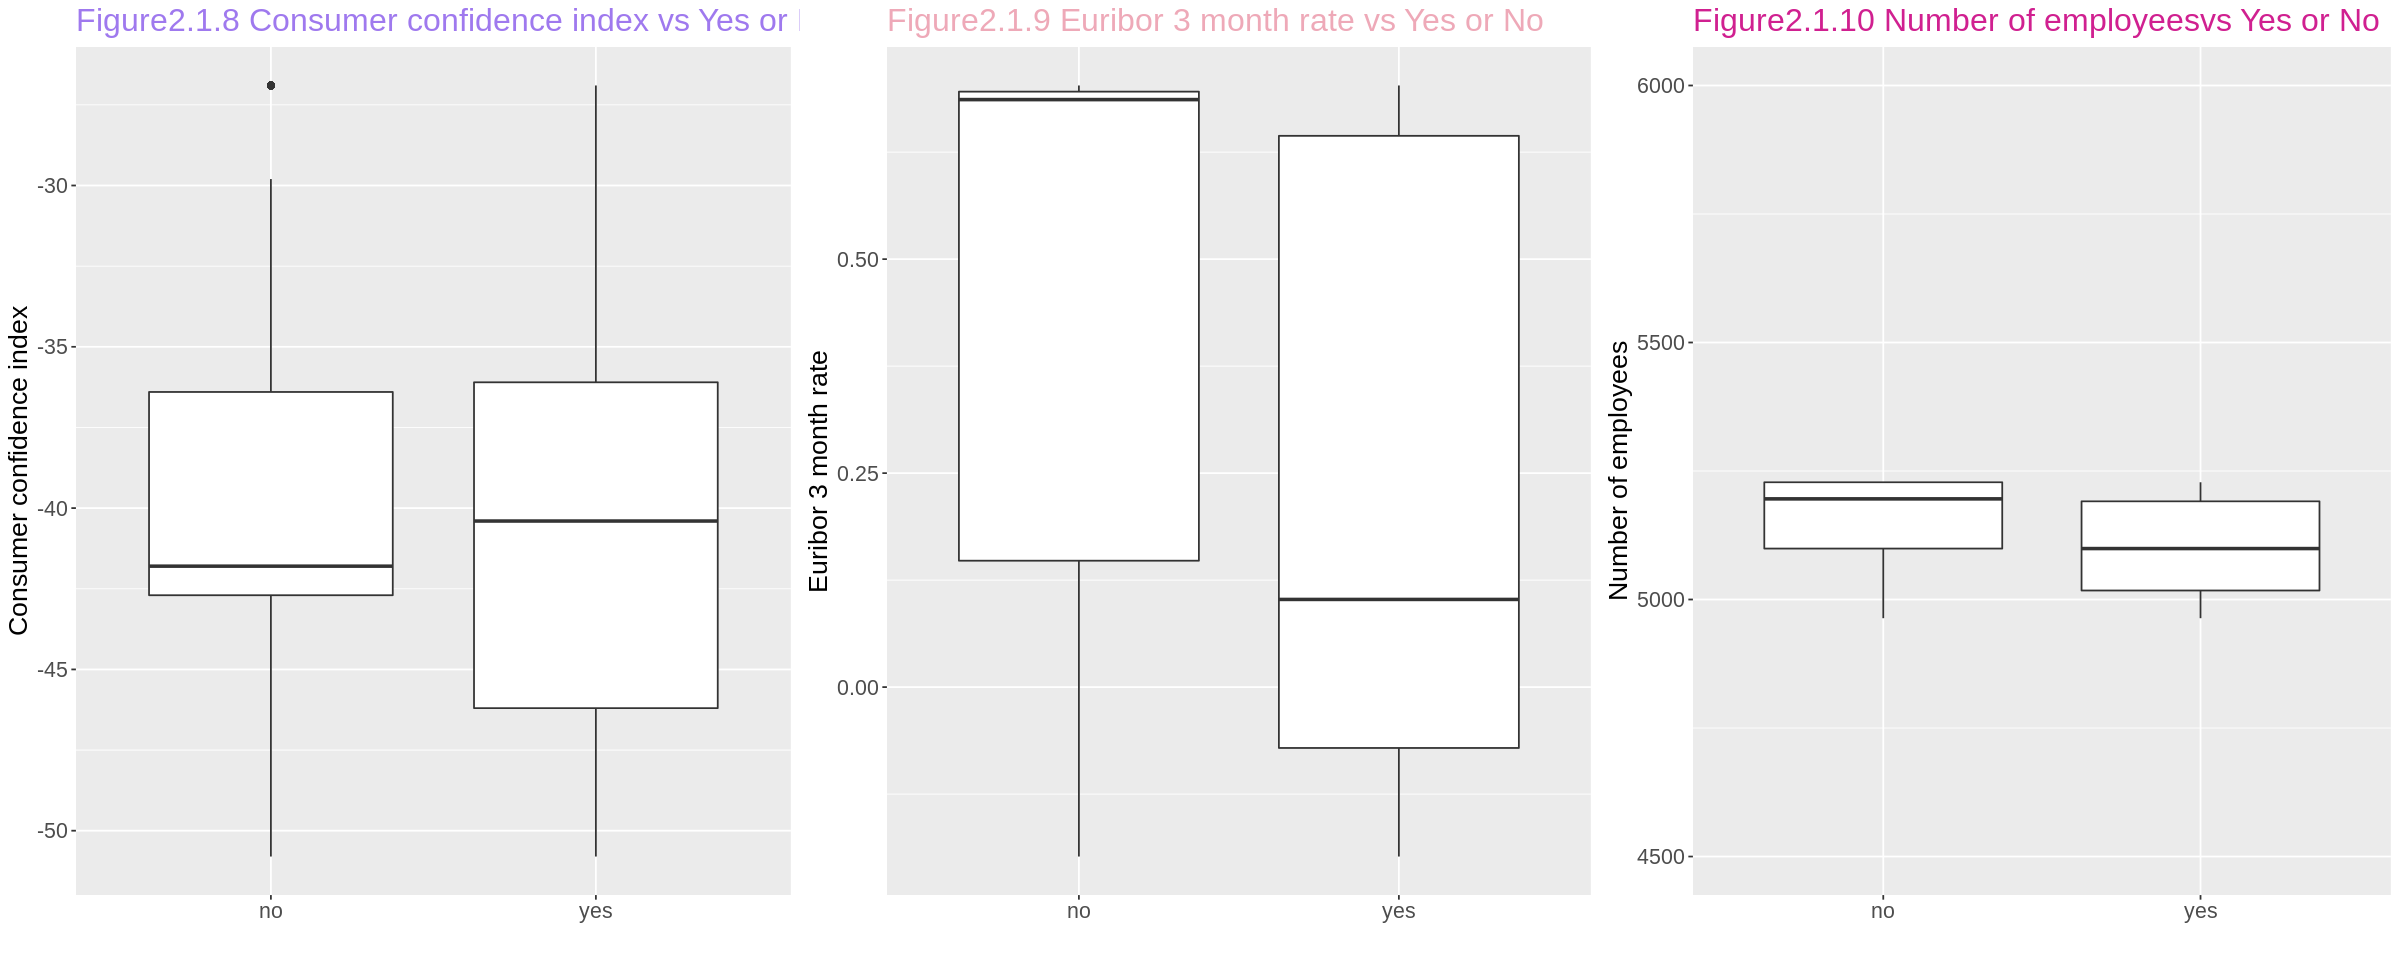

In [45]:
options(repr.plot.width = 20, repr.plot.height = 8)

bank_data_mutated<- mutate(bank_data,euribor_3m= log10(as.numeric(euribor_3m)))

age_diag_plot <- ggplot(bank_data,aes(y=age,x=y)) +
    geom_boxplot()+
    labs(x="", y="Age") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure2.1.2 Age vs Yes or No")+
    theme(plot.title = element_text(color = "red1"))

duration_diag_plot <- ggplot(bank_data,aes(y=duration,x=y)) +
    geom_boxplot()+
    labs(x="", y="duration") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure2.1.3 Duration vs Yes or No")+
    theme(plot.title = element_text(color = "sandybrown"))

campaign_diag_plot <- ggplot(bank_data,aes(y=campaign,x=y)) +
    geom_boxplot()+
    labs(x="", y="Number of contacts performed") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure2.1.4 Campaign vs Yes or No")+
    theme(plot.title = element_text(color = "lightgoldenrod3"))

combined_diag_plot <- grid.arrange(age_diag_plot,duration_diag_plot,campaign_diag_plot, ncol = 3)

pdays_diag_plot <- ggplot(bank_data,aes(y=pdays,x=y)) +
    geom_boxplot()+
    labs(x="", y="Number of days that passed by") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure2.1.5 Pdays vs Yes or No")+
    theme(plot.title = element_text(color = "springgreen4"))+
    ylim(997,1001)

emp_var_rate_diag_plot <- ggplot(bank_data,aes(y=emp_var_rate,x=y)) +
    geom_boxplot()+
    labs(x="", y="Employment Variation Rate)") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure2.1.6 Employment Variation Rate vs Yes or No")+
    theme(plot.title = element_text(color = "aquamarine4"))

cons_price_idx_diag_plot <- ggplot(bank_data,aes(y=cons_price_idx,x=y)) +
    geom_boxplot()+
    labs(x="", y="Consumer Price Index") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure2.1.7 Consumer Price Index vs Yes or No")+
    theme(plot.title = element_text(color = "lightskyblue"))


combined_diag_plot_2 <- grid.arrange(pdays_diag_plot,
                                     emp_var_rate_diag_plot,
                                     cons_price_idx_diag_plot,
                                     ncol = 3)

cons_conf_idx_diag_plot <- ggplot(bank_data,aes(y=cons_conf_idx,x=y)) +
    geom_boxplot()+
    labs(x="", y="Consumer confidence index") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure2.1.8 Consumer confidence index vs Yes or No")+
    theme(plot.title = element_text(color = "mediumpurple2"))

euribor_3m_diag_plot <- ggplot(bank_data_mutated,aes(y=euribor_3m,x=y)) +
    geom_boxplot()+
    labs(x="", y="Euribor 3 month rate") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure2.1.9 Euribor 3 month rate vs Yes or No")+
    theme(plot.title = element_text(color = "pink2"))

nr_employed_diag_plot <- ggplot(bank_data,aes(y=nr_employed,x=y)) +
    geom_boxplot()+
    labs(x="", y="Number of employees") +
    theme(text=element_text(size=16)) +                    
    labs(title = "Figure2.1.10 Number of employeesvs Yes or No")+
    theme(plot.title = element_text(color = "violetred"))+
    ylim(4500,6000)

combined_diag_plot_3 <- grid.arrange(cons_conf_idx_diag_plot,
                                     euribor_3m_diag_plot,
                                     nr_employed_diag_plot,
                                     ncol = 3)

Table 2.1.3: Boxplots for all numerical variables

Figure 2.1.1 shows that the sample distribution of the  last contact duration is right skewed, with most durations being short and a few lasting longer than the rest. This feature of the distribution can also be seen in Figure 2.1.3. Additionally, a difference in median of duration between successful outcome and failed outcome is shown in the boxplot. 

It should be noted that the number of observations of successful outcomes is much smaller than the number of observations of failed outcomes, i.e. the data is unbalanced. Therefore, we will randomly select a portion of the observations of successful outcomes so that the total number of observations from each category is similar.

### 2.2 Clean and wrangle the data set

Drop irrelevant columns and rows. Keep only last call duration (duration) and contact outcome (y). Display the summary of the wrangled data.

In [27]:
bank_data_sample <- bank_data %>%
                filter(age < 25)%>%
                select(y, duration)

bank_data_summary <- bank_data_sample %>%
                    mutate(y = as.factor(y))%>%
                    summary()
bank_data_summary

   y          duration     
 no :812   Min.   :   5.0  
 yes:256   1st Qu.: 111.0  
           Median : 201.0  
           Mean   : 278.2  
           3rd Qu.: 354.0  
           Max.   :2078.0  

Table 2.2.1: Summary of the wrangled data

### 2.3 Relevant raw data

Compute the number of row, the mean and standard deviation of duration

In [44]:
number_rows <- bank_data_sample %>%
               nrow()
number_rows

sample_estimates<- bank_data_sample %>%
                group_by(y) %>%
                summarize(mean = mean(duration),sd = sd(duration))
sample_estimates

[1] 1068

y,mean,sd
<chr>,<dbl>,<dbl>
no,228.6305,217.1621
yes,435.5469,308.7686


Table 2.3.1: Summary of the mean and standard deviation of duration of successful and failed outcomes

Plot the distribution of duration of the two categories

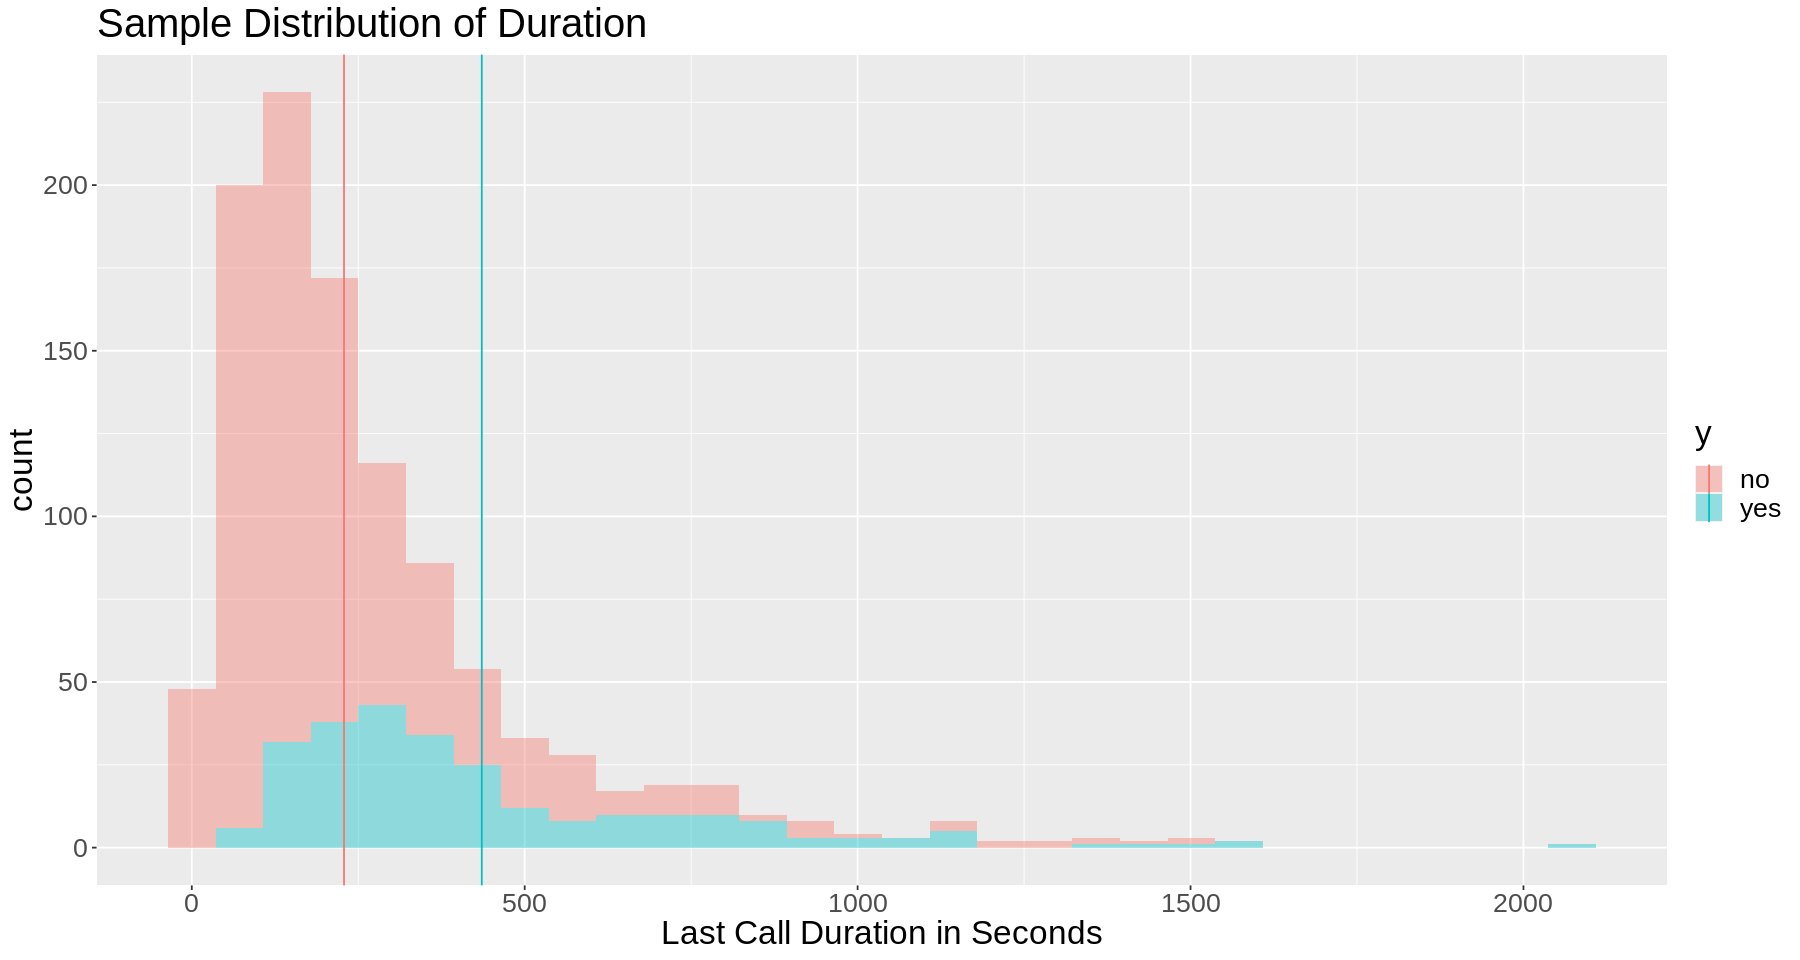

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 8)
sample_mean_distribution <- bank_data_sample %>% 
                    ggplot(aes(x = duration, fill = y)) +
                    geom_histogram(bins = 30, alpha = 0.4)+
                    labs(x = 'Last Call Duration in Seconds') +
                    ggtitle("Sample Distribution of Duration")+
                    theme(text = element_text(size = 20))+
                    geom_vline(data = sample_estimates, aes(xintercept = mean, color = y))

sample_mean_distribution 

Figure 2.3.1: Sample distribution of last call durations(in seconds) of both successful and failed campaign outcomes

The sample distribution of duration of last call and the preliminary results above show that there is a difference in duration of last call between successful and failed campaign results. However, they are not sufficient enough to determine whether the difference in median is significant. Therefore, a hypothesis test for differences between the medians of successful and failed outcomes is conducted. Confidence intervals will be constructed to determine a range of plausible differences.  IQR will be calculated to indicate the shape and spread of the distribution of the difference in the median. Since the sample size our data is large enough, both bootstrapping and the asymptotic method are suitable for this study. We will conduct tests using both methods in the report and compare their results.

It should be noted that the number of observations of successful outcomes is much smaller than the number of observations of failed outcomes, i.e. the data is unbalanced. Therefore, we will randomly select a portion of the observations of successful outcomes so that the total number of observations from each category is similar.

### 2.4 Methods

(The good thing about this report is the fact that we were able to obtain a good enough dataset for our purpose. We plan to use bootstrapping to obtain our estimate of sampling distribution.)??

#### Hypothesis testing:

We want to compare the difference in median of call duration between successful and failure outcomes. In order to achieve our goal, we want to test the null hypothesis H0 against alternative hypothesis H1. We first start by defining the two sample medians:

m0: mean call duration of successful sessions

m1: mean call duration of failed sessions

Then we define the null and alternative hypothesis as follow:

H0:  m0 - m1 = 0

H1: m0 - m1 > 0

We plan to use a 90% confidence interval (for a significant level of 0.05) for our hypothesis testing. 

We are expecting to reject the null hypothesis, as call duration would likely have an effect on success rate. 

Therefore, we will carry out our analysis as follows:
1. Compute the observed mean difference between two groups in terms of call duration
2. Simulate bootstrap samples, derive sample mean within each bootstrapped sample to obtain a bootstrap sampling distribution
3. Use a right-tailed test to calculate p-value and test it against a significant level of 0.05. 
4. Finally, we visualize the result, and determine whether we reject the null hypothesis or not. 

### Test Statictics

In [ ]:
# Compute difference in sample means between call duration of a successful outcome and a failure
sample_means_diff <- sample_estimates%>%
                    select(y, mean)%>%
                    pivot_wider(names_from = y, values_from = mean)%>%
                    transmute(diff = yes - no)%>%
                    pull(diff)
sample_means_diff

[1] 206.9163

### Bootstrap sampling distribution

In [ ]:
# Generate the bootstrap sampling distribution
set.seed(1000)

null_model_bank <- bank_data_sample %>%
                specify(formula = duration ~ y) %>% 
                hypothesize(null = "independence") %>% 
                generate(reps = 500, type = "permute") %>% 
                calculate(stat="diff in means", order = c("yes", "no"))

head(null_model_bank)

replicate,stat
<int>,<dbl>
1,8.937231
2,-3.938039
3,36.814809
4,-18.575566
5,-24.776863
6,7.647649


### P-value and confidence intervals

Warning message:
“Please be cautious in reporting a p-value of 0. This result is an approximation based on the number of `reps` chosen in the `generate()` step. See `?get_p_value()` for more information.”


p_value
<dbl>
0


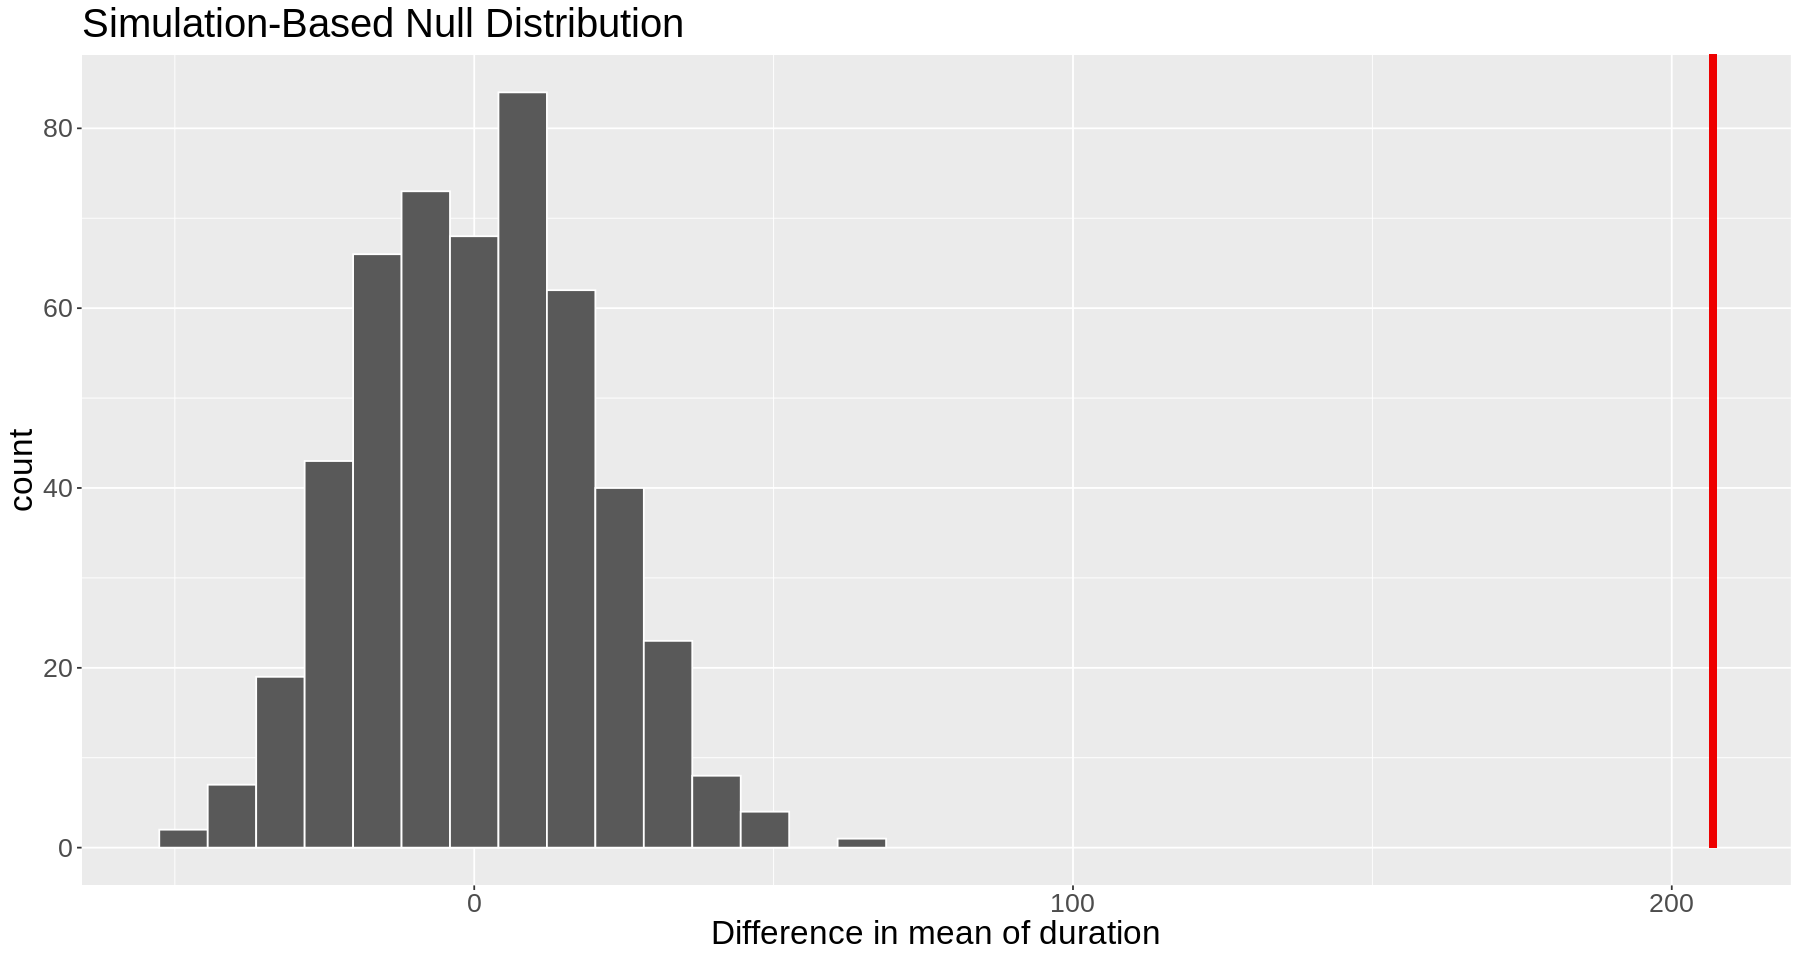

In [ ]:
# Compute p value
p_value_duration = null_model_bank %>%
                    get_p_value(obs_stat = sample_means_diff, direction = "right")
p_value_duration

# Visualize the bootstrap sampling distribution of difference of means of duration with shaded p-value 
options(repr.plot.width = 15, repr.plot.height = 8)
bank_result_plot <- null_model_bank %>%
                    visualize() + 
                    shade_p_value(obs_stat = sample_means_diff, direction = "right")+
                    theme(text = element_text(size = 20))+
                    xlab("Difference in mean of duration")
bank_result_plot

The null hypothesis is rejected and our test is statistically significant ( the differences between two groups are significant) as the p value is 0.

In [ ]:
# Compute the corresponding 90% confidence interval 
duration_ci_0.9 <- null_model_bank %>%
                    get_confidence_interval(level = 0.9)
duration_ci_0.9 

lower_ci,upper_ci
<dbl>,<dbl>
-28.92844,29.49682


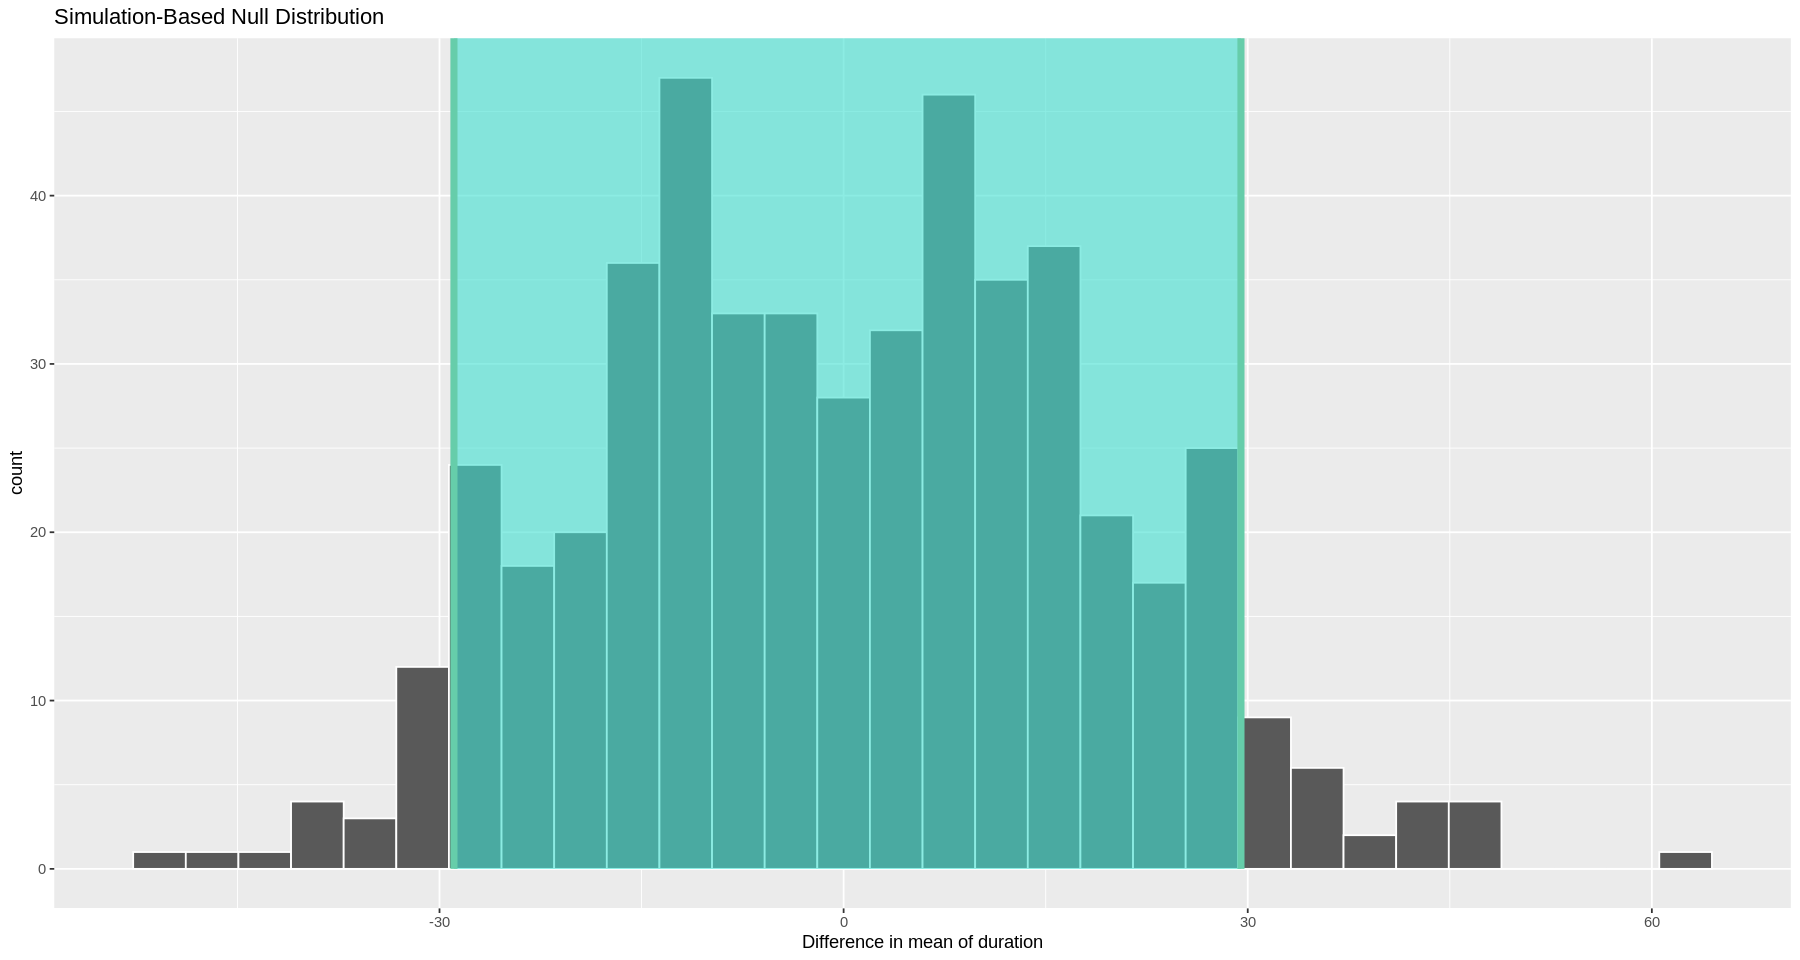

In [ ]:
# Visualize bootstrap sampling distribution of difference of means of duration with shaded 90% confidence interval
options(repr.plot.width = 15, repr.plot.height = 8)
shade_ci_duration <- null_model_bank %>%
                    visualize(bins = 30)+
                    shade_confidence_interval(endpoints = duration_ci_0.9 )+
                    labs(x = "Difference in mean of duration")
shade_ci_duration

- We are 90% 90% confident that the interval [-6.798716, 7.366154] contains the population difference of means of duration of successful and failed sessions

### Applying the Central Limit Theroem

In [ ]:
#Obtain the 95% confidence interval for the difference in means of yes and no call duration using CLT.
head(bank_data_sample) 
yes_sample <- 
    bank_data_sample %>% 
    filter(y == 'yes') %>% 
    pull(duration)
head(yes_sample) 

no_sample <- 
    bank_data_sample %>% 
    filter(y == 'no') %>% 
    pull(duration)
head(no_sample)

duration_diff_means_ci <- 
    tibble(
        lower_ci = mean(yes_sample) - mean(no_sample) - qnorm(0.95) * sqrt(var(yes_sample)/length(yes_sample) + var(no_sample)/length(no_sample)),
        upper_ci = mean(yes_sample) - mean(no_sample) + qnorm(0.95) * sqrt(var(yes_sample)/length(yes_sample) + var(no_sample)/length(no_sample))
    )

duration_diff_means_ci

y,duration
<chr>,<dbl>
no,380
no,165
no,195
no,266
no,140
no,421


[1]  654  757 1073  764  768  700

[1] 380 165 195 266 140 421

lower_ci,upper_ci
<dbl>,<dbl>
172.7884,241.0443


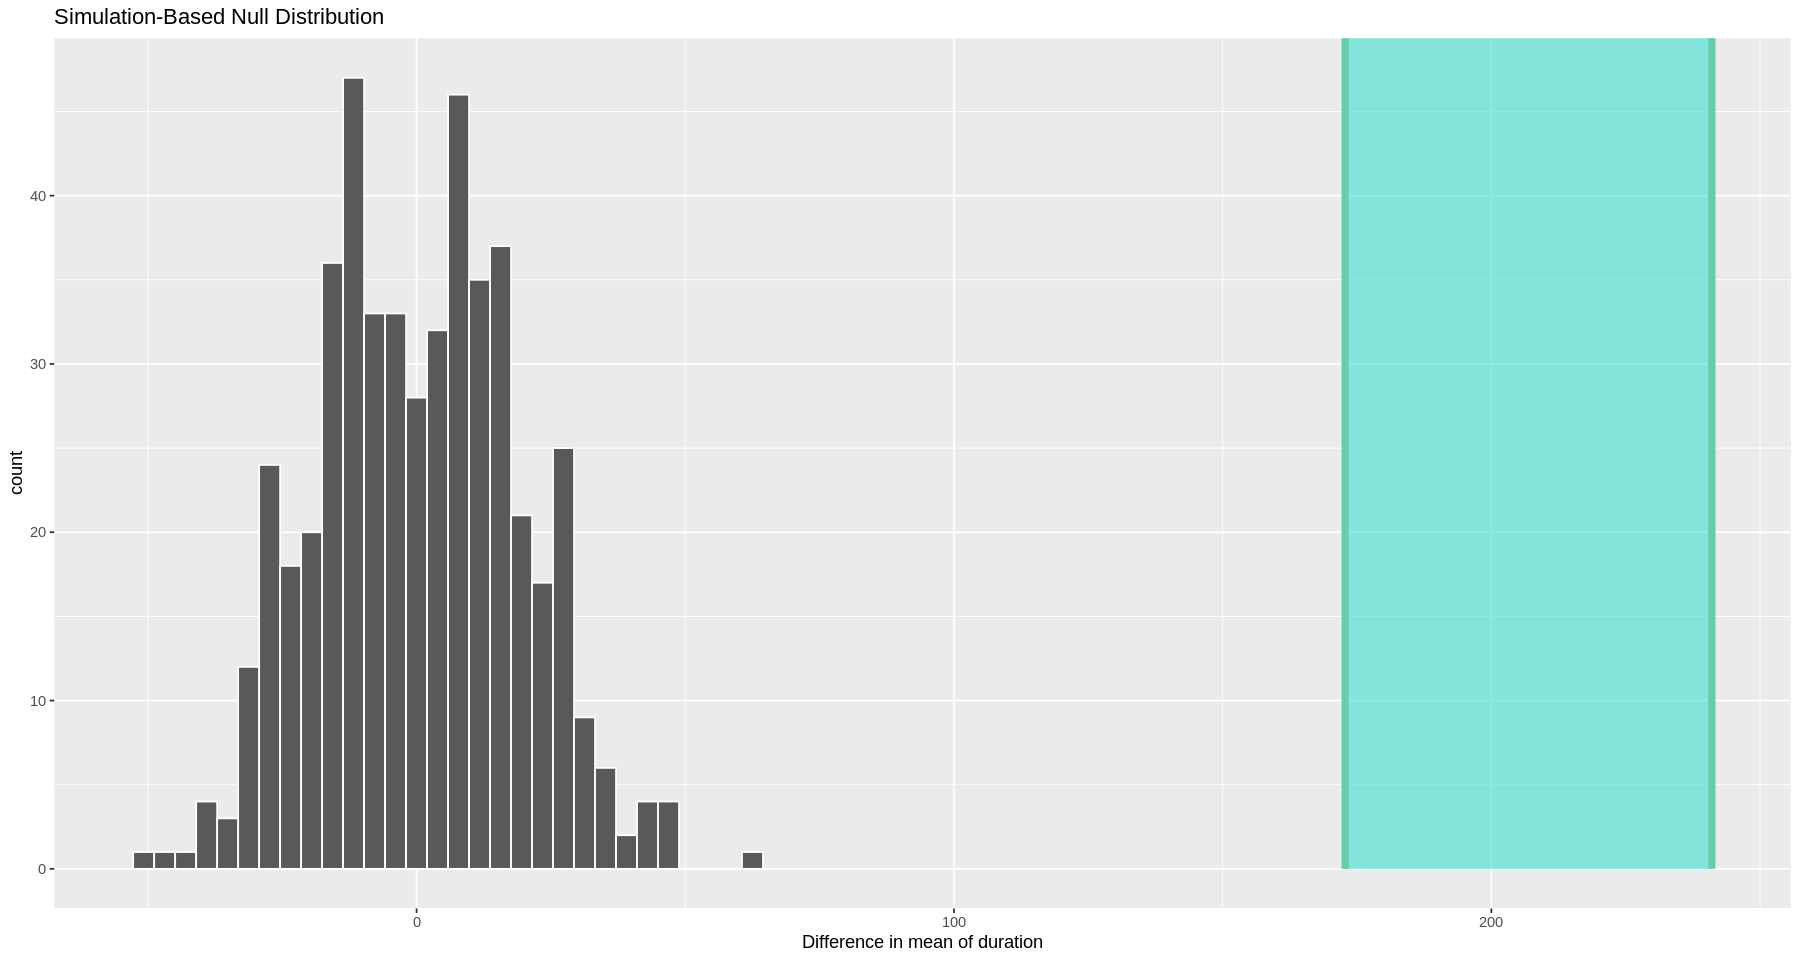

In [ ]:
# Visualize difference of means of duration using CLT, with shaded 90% confidence interval
options(repr.plot.width = 15, repr.plot.height = 8)
shade_ci_duration <- null_model_bank %>%
                    visualize(bins = 30)+
                    shade_confidence_interval(endpoints = duration_diff_means_ci)+
                    labs(x = "Difference in mean of duration")
shade_ci_duration

The confidence interval is very similar to the one generated with bootstrapping. 

In [ ]:
#calculate t statistic using sample estimates and a two-sample t test
sample_estimates
test_statistic <- 
        (sample_estimates$mean[2] - sample_estimates$mean[1]) /
        sqrt(sample_estimates$sd[2]^2/sample_estimates$n[2] +
             sample_estimates$sd[1]^2/sample_estimates$n[1])

test_statistic

#get a p value from t statistic
p_t_test <- pnorm(test_statistic, lower.tail = FALSE)

p_t_test

y,mean,sd
<chr>,<dbl>,<dbl>
no,228.6305,217.1621
yes,435.5469,308.7686


Warning message:
“Unknown or uninitialised column: `n`.”
Warning message:
“Unknown or uninitialised column: `n`.”


numeric(0)

numeric(0)

The p value obtained with a two-sample t-test is also 0, which meets the bootstrap sampling distribution. 

## <img src="https://th.bing.com/th/id/R.3849382c629e1a734ac29d79a0656ea2?rik=A6LFA%2bGN%2b07q9Q&riu=http%3a%2f%2fwww.pngmart.com%2ffiles%2f1%2fPhone.png&ehk=DewsIHJL6yqq69NhIyBSqo6A%2fEnade%2boWXdZCaNB03g%3d&risl=&pid=ImgRaw&r=0" width=30> Reference

1.D, Dua, and Graff C. “Bank Marketing Data Set.” UCI Machine Learning Repository, 2019, https://archive.ics.uci.edu/ml/datasets/Bank+Marketing.   
2.Moro, Sérgio, et al. “A Data-Driven Approach to Predict the Success of Bank Telemarketing.” Decision Support Systems, North-Holland, 13 Mar. 2014, https://www.sciencedirect.com/science/article/pii/S016792361400061X. 